## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Extração Dataset

In [3]:
filepath = '../data/raw/ecommerce-dataset.xlsx'
df = pd.read_excel(filepath, sheet_name="E Comm")

In [ ]:
df.head()

## Divisão Treino e Teste

In [ ]:
x = df.loc[:, ~df.columns.isin(['Churn', 'CustomerID'])]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Merge

In [ ]:
train = x_train.merge(y_train, left_index=True, right_index=True)
test = x_test.merge(y_test, left_index=True, right_index=True)

## Análise Exploratória (EDA) E Preparação dos Dados


In [ ]:
x_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
y_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
# VERIFICAR TIPO DOS DADOS
pd.DataFrame({'train': x_train.dtypes, 'test': x_test.dtypes})

In [ ]:
# calcula a proporção de dados nulos em relação a quantidade total dos dados
pd.DataFrame ({'train': round(100*(x_train.isnull().sum()/x_train.count()), 2),
              'test': round(100*(x_test.isnull().sum()/x_test.count()), 2)})

## Análise Individual das Features

### Churn

In [11]:
y_train.isnull().sum(), y_test.isnull().sum()

(Churn    0
 dtype: int64,
 Churn    0
 dtype: int64)

In [12]:
y_train.value_counts()

Churn
0        3272
1         669
Name: count, dtype: int64

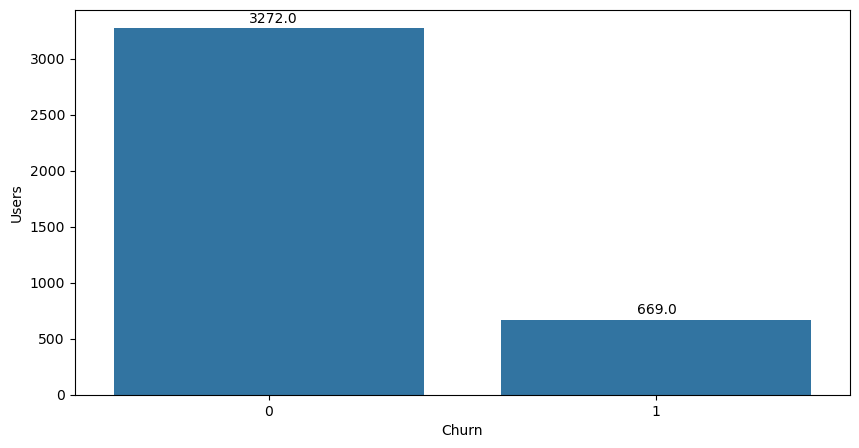

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=y_train, x='Churn')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.ylabel('Users')
plt.show()

In [23]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

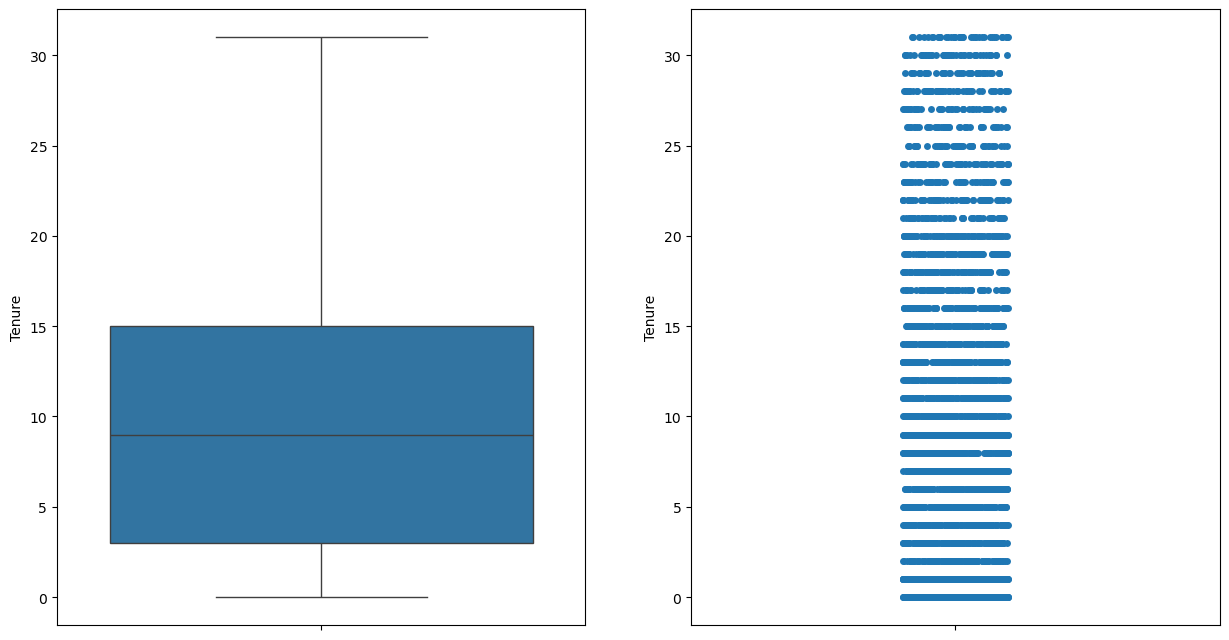

In [24]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

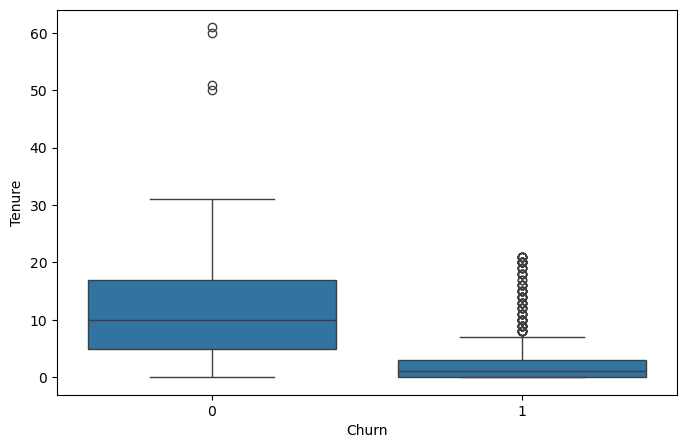

In [25]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

### Tenure
O tempo que o usuário está na organização (em meses)

Informações: 
Variável numérica discreta

In [14]:
x_train['Tenure'].isnull().sum(), x_test['Tenure'].isnull().sum()

(198, 66)

In [15]:
x_train['Tenure'].head()

2884    19.0
3004    13.0
3124     5.0
5279    12.0
2868    20.0
Name: Tenure, dtype: float64

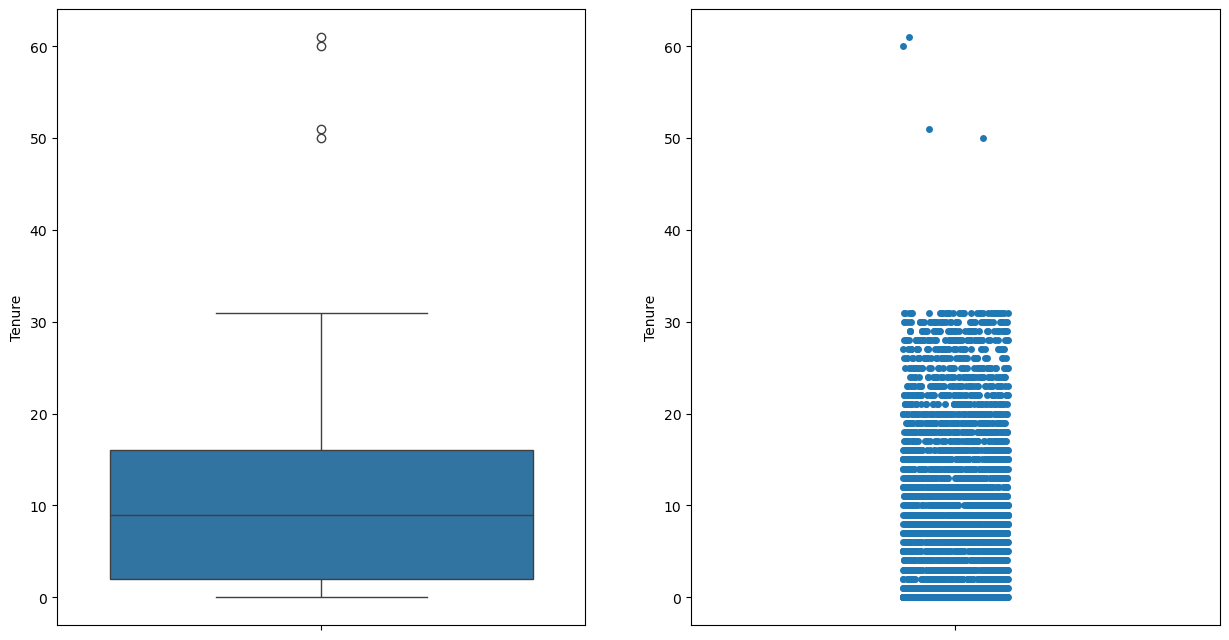

In [16]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [17]:
x_train['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 60 e 50

5534    61.0
2719    60.0
3743    51.0
928     50.0
4223    31.0
        ... 
115      NaN
100      NaN
2122     NaN
2042     NaN
2760     NaN
Name: Tenure, Length: 3941, dtype: float64

In [18]:
x_test['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 61 e 51

2915    31.0
3433    31.0
3628    31.0
5039    31.0
3364    31.0
        ... 
1377     NaN
2611     NaN
898      NaN
737      NaN
2160     NaN
Name: Tenure, Length: 1689, dtype: float64

In [19]:
# A abordagem será atribuir a esses outliers o valor máximo encontrado: 31

x_train['Tenure'] = np.where(x_train['Tenure'] > 31, 31, x_train['Tenure'])
x_test['Tenure'] = np.where(x_test['Tenure'] > 31, 31, x_test['Tenure'])

In [20]:
## Dados nulos

# Tratar dados nulos substituindo pela mediana
x_train['Tenure'].median()

9.0

In [21]:
x_train[x_train['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
387,NaN,Phone,1,9.0,CC,Male,2.0,4,Mobile,2,Single,1,0,13.0,0.0,1.0,1.0,120.45
1196,NaN,Phone,1,15.0,Debit Card,Female,3.0,3,Mobile,3,Single,5,0,12.0,1.0,2.0,0.0,121.05
1497,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Married,3,1,20.0,0.0,4.0,5.0,123.06
258,NaN,Phone,1,17.0,CC,Female,2.0,3,Mobile,4,Divorced,2,0,13.0,1.0,1.0,2.0,122.44
1821,NaN,Phone,1,23.0,UPI,Male,3.0,4,Mobile,4,Married,2,0,21.0,1.0,1.0,0.0,121.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,Phone,1,6.0,CC,Female,3.0,3,Mobile,3,Married,8,0,14.0,0.0,1.0,2.0,122.32
100,NaN,Phone,1,9.0,Debit Card,Male,3.0,4,Mobile,2,Divorced,4,0,17.0,0.0,1.0,0.0,121.77
2122,NaN,Mobile Phone,1,16.0,Debit Card,Female,2.0,4,Mobile Phone,5,Single,2,0,13.0,0.0,1.0,0.0,114.16
2042,NaN,Computer,3,26.0,Cash on Delivery,Female,2.0,3,Mobile,1,Married,2,0,15.0,0.0,1.0,2.0,121.57


In [22]:
x_test[x_test['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1387,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,0.0,1.0,1.0,122.93
2322,NaN,Computer,1,32.0,Cash on Delivery,Female,3.0,4,Mobile,3,Married,2,0,20.0,1.0,1.0,0.0,120.29
2237,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
644,NaN,Computer,1,6.0,CC,Female,3.0,4,Mobile,3,Married,2,0,13.0,1.0,1.0,3.0,120.07
1303,NaN,Phone,3,6.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,0.0,2.0,2.0,122.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,NaN,Phone,1,15.0,CC,Male,2.0,4,Mobile,3,Single,2,0,13.0,0.0,1.0,8.0,122.06
2611,NaN,Phone,1,15.0,Debit Card,Male,3.0,3,Mobile,5,Married,2,0,20.0,0.0,1.0,4.0,122.89
898,NaN,Phone,1,6.0,Debit Card,Female,2.0,3,Mobile,5,Divorced,3,0,22.0,1.0,1.0,0.0,120.66
737,NaN,Computer,1,23.0,Debit Card,Male,3.0,5,Mobile,3,Single,3,0,13.0,1.0,1.0,0.0,122.90


In [23]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

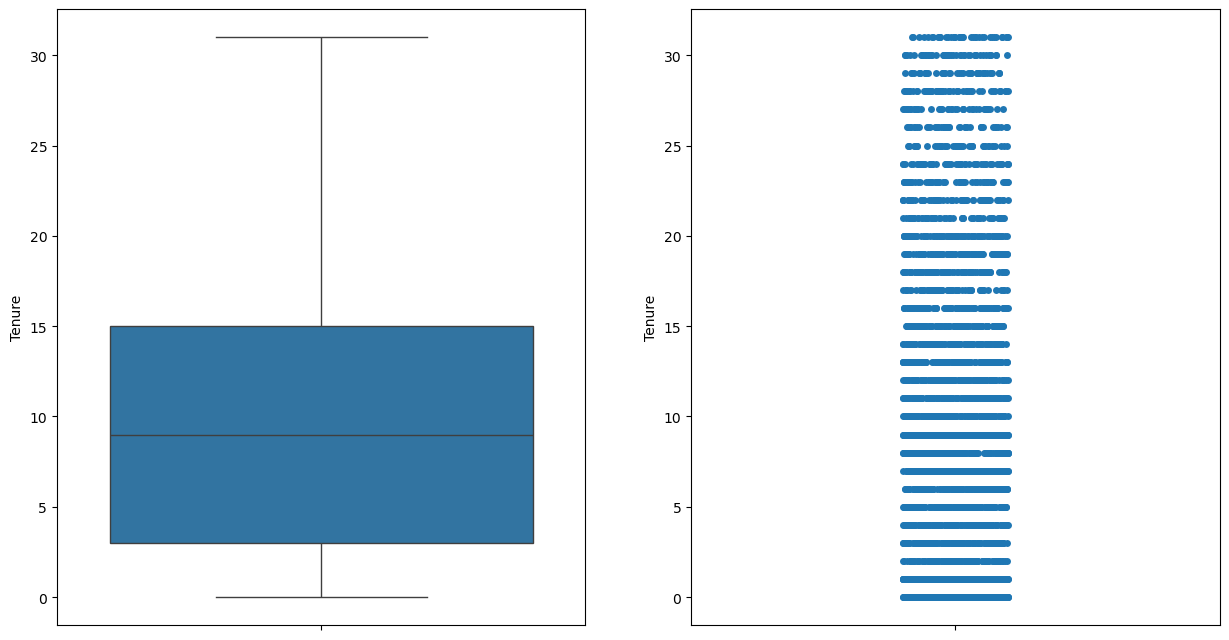

In [24]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

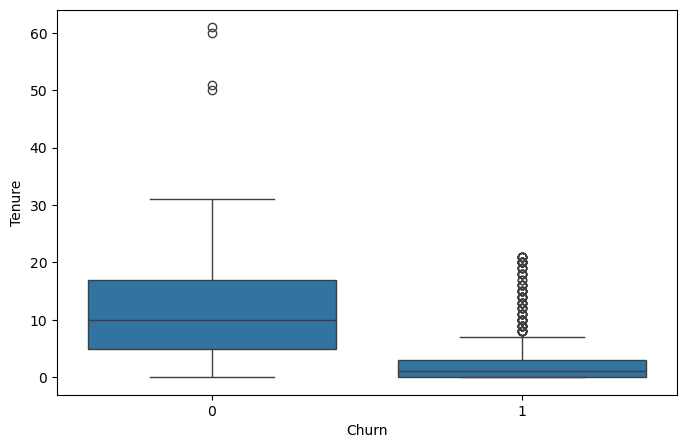

In [25]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

In [26]:
#correlação de pirsen
#-1 a 1 
# 0: não há correlação entre as variáveis

# 1: correlação positiva perfeita (quando uma cresce, a outra cresce tb)
# -1: correlação negativa (quando uma cresce, a outra decresce)


train[['Tenure', 'Churn']].corr()
## Baseado no resultado, quanto mais tempo de casa, menos provável de ser um possível churn

,Tenure,Churn
Tenure,1.000000,-0.349023
Churn,-0.349023,1.000000


### PreferredLoginDevice

Variável categórica nominal

In [27]:
x_train['PreferredLoginDevice'].isnull().sum(), x_test['PreferredLoginDevice'].isnull().sum()

(0, 0)

In [28]:
x_train['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    1900
Computer        1166
Phone            875
Name: count, dtype: int64

In [29]:
x_train['PreferredLoginDevicemobilePhone'] = np.where(x_train['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_train['PreferredLoginDevice_computer'] = np.where(x_train['PreferredLoginDevice'] == "Computer", 1, 0)
x_train['PreferredLoginDevice_Phone'] = np.where(x_train['PreferredLoginDevice'] == "Phone", 1, 0)
x_train.drop(columns = ['PreferredLoginDevice'], inplace=True)

In [30]:
x_test['PreferredLoginDevice_mobilePhone'] = np.where(x_test['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_test['PreferredLoginDevice_computer'] = np.where(x_test['PreferredLoginDevice'] == "Computer", 1, 0)
x_test['PreferredLoginDevice_Phone'] = np.where(x_test['PreferredLoginDevice'] == "Phone", 1, 0)
x_test.drop(columns = ['PreferredLoginDevice'], inplace=True)

### CityTier

Qual a faixa de desenvolvimento em que a cidade se encontra

Variável numérica ordinal

In [31]:
x_train['CityTier'].isnull().sum(), x_test['CityTier'].isnull().sum()

(0, 0)

In [32]:
x_train['CityTier'].value_counts()

CityTier
1    2593
3    1177
2     171
Name: count, dtype: int64